### This dataset contains information about various health and lifestyle factors of 100000 individuals

#### Columns:

id : Unique identifier <br>
age : Age of the person <br>
gender : Gender (Male/Female) <br>
bmi : Body Mass Index <br>
daily_steps : Number of steps per day <br>
sleep_hours : Average sleep duration (hours) <br>
water_intake_l : Daily water intake (liters) <br>
calories_consumed : Calories consumed per day <br>
smoker : Smoking status (0 = No, 1 = Yes) <br>
alcohol : Alcohol use (0 = No, 1 = Yes) <br>
resting_hr : Resting heart rate (bpm) <br>
systolic_bp : Systolic blood pressure<br>
diastolic_bp : Diastolic blood pressure<br>
cholesterol : Cholesterol level (mg/dL)<br>
family_history : Family history of disease (0 = No, 1 = Yes)<br>
disease_risk : Risk of disease (0 = Low, 1 = High)


In [1]:
%pip install pandas plotly
%pip install nbformat
%pip install streamlit pandas plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "/Users/tanya/Desktop/Data Science Journey/ML/my_project/health_lifestyle_dataset.csv"
df = pd.read_csv(path)

In [4]:
num_cols = df.shape[1]
num_rows = df.shape[0]
print(f"Number of columns: {num_cols} \nNumber of rows: {num_rows}")

Number of columns: 16 
Number of rows: 100000


In [5]:
print("a glimpse into the dataset:")
df.head()


a glimpse into the dataset:


,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


Let's have a bird's eye view on the data

In [6]:
age = df["age"]
bmi = df["bmi"]
steps = df["daily_steps"]
sleep = df["sleep_hours"]

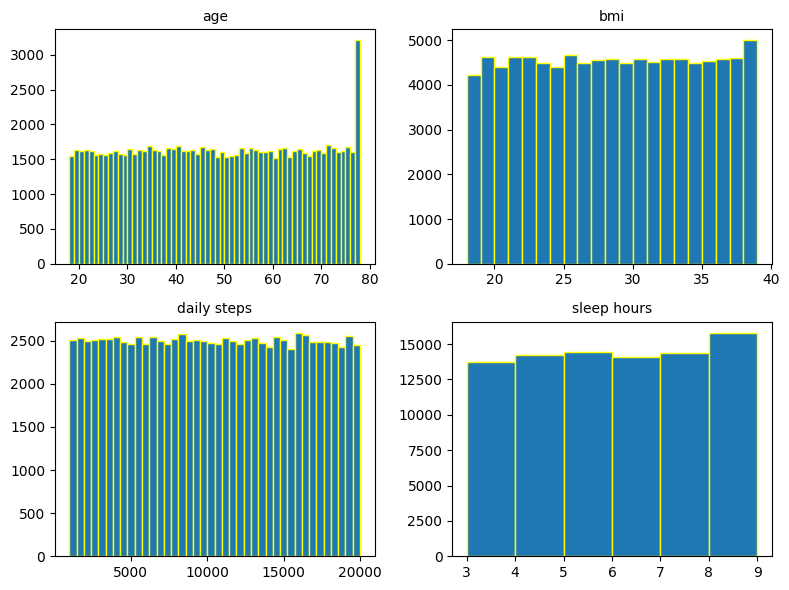

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))  # 2x2 grid

axes[0, 0].hist(age, edgecolor = "yellow", bins = range(min(age), max(age)))
axes[0, 0].set_title("age", fontsize = 10)

axes[0, 1].hist(bmi, edgecolor = "yellow", bins = range(round(min(bmi)), round(max(bmi))))
axes[0, 1].set_title("bmi", fontsize = 10)

axes[1, 0].hist(steps, edgecolor = "yellow", bins = 40)
axes[1, 0].set_title("daily steps", fontsize = 10)

axes[1, 1].hist(sleep, edgecolor = "yellow", bins = range(round(min(sleep)), round(max(sleep))))
axes[1, 1].set_title("sleep hours", fontsize = 10)


plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

# Assuming age, bmi, steps, sleep are each pandas Series
# Example (you can skip this if you already have them):
# age, bmi, steps, sleep = df["age"], df["bmi"], df["steps"], df["sleep"]

# Put them in a dictionary for easy looping
data = {
    "Age": age,
    "BMI": bmi,
    "Daily Steps": steps,
    "Sleep Hours": sleep
}

# Create 2×2 grid
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=list(data.keys())
)

# Plot each histogram
positions = [(1,1), (1,2), (2,1), (2,2)]

for (title, series), (r, c) in zip(data.items(), positions):
    # build a histogram for each Series
    h = px.histogram(
        x=series,                     
        color_discrete_sequence=["#1f77b4"]  # bar colour
    )
    # add its traces into the grid
    for trace in h.data:
        fig.add_trace(trace, row=r, col=c)

    # customise axis titles
    fig.update_xaxes(title_text=title, row=r, col=c)
    fig.update_yaxes(title_text="Count", row=r, col=c)

# overall figure styling
fig.update_layout(
    height=600, width=800,
    showlegend=False,
    title_text="Health Dataset Histograms",
    title_x=0.5,
    font=dict(size=12),
    bargap=0.05
)

fig.show()